# AAE 722 Homework 3 - Wenshi (Gary) Sun
**Chapters 7 & 8**

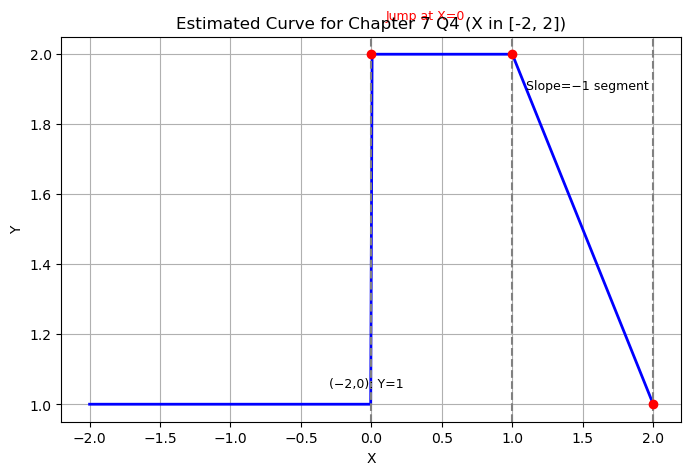

Intercepts and Slopes by Interval (X in [-2,2]):
(-2,0): slope = 0, intercept = 1
(0,1): slope = 0, intercept = 2
(1,2): slope = -1, intercept = 3


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def b1(x):
    return np.where((x >= 0) & (x < 1), 1, np.where((x >= 1) & (x <= 2), 2 - x, 0))

# Model parameters
beta0 = 1
beta1 = 1

# Generate X range for [-2, 2]
X = np.linspace(-2, 2, 400)
Y = beta0 + beta1*b1(X)

# --- Plot estimated curve ---
plt.figure(figsize=(8,5))
plt.plot(X, Y, color='b', lw=2)
plt.axvline(0, color='gray', linestyle='--')
plt.axvline(1, color='gray', linestyle='--')
plt.axvline(2, color='gray', linestyle='--')
plt.title('Estimated Curve for Chapter 7 Q4 (X in [-2, 2])')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

# Mark key points
plt.scatter([0,1,2], [2,2,1], color='red', zorder=5)
plt.text(-0.3,1.05,'(−2,0): Y=1',fontsize=9)
plt.text(0.1,2.1,'Jump at X=0',fontsize=9,color='red')
plt.text(1.1,1.9,'Slope=−1 segment',fontsize=9)
plt.show()

# Intercepts and slopes per region
regions = {
    '(-2,0)': {'slope': 0, 'intercept': beta0},
    '(0,1)': {'slope': 0, 'intercept': beta0 + beta1},
    '(1,2)': {'slope': -1, 'intercept': 3},
}

print("Intercepts and Slopes by Interval (X in [-2,2]):")
for k,v in regions.items():
    print(f"{k}: slope = {v['slope']}, intercept = {v['intercept']}")

### Q4 Discussion

The estimated curve is **piecewise-defined**:

- For **X < 0**, the function is flat at **Y = 1**.  
- At **X = 0**, there is a **discontinuous jump** to **Y = 2**, and the curve remains flat until **X = 1**.  
- From **X = 1 to X = 2**, the slope becomes **−1**, and the line decreases linearly back to **Y = 1** at **X = 2**.  

Thus, the fitted curve is **continuous at X = 1 and X = 2**, but **discontinuous at X = 0**.  
This piecewise structure reflects how the basis function \( b_1(X) \) changes across the defined intervals.


## Chapter 8 — Question 2  
### Discussion: Why Boosting with Stumps Is Additive

In boosting, the model is built **iteratively** according to:

$$
\hat{f}^{(m)}(X) = \hat{f}^{(m-1)}(X) + \lambda h_m(X)
$$

Each base learner $( h_m(X) )$ is trained to correct the **residuals** from the previous step.

---

When the weak learners are **decision stumps** (i.e., trees of depth 1),  
each $( h_m(X) )$ depends only on a **single feature** $( X_j )$.  
Therefore, every update adds a **one-dimensional function** $( f_j(X_j) )$ to the model.

After $( M )$ iterations, the final boosted model becomes:

$$
\hat{f}(X) = \sum_{j=1}^{p} f_j(X_j)
$$

---

This is an **additive model**, since the overall prediction is the **sum of individual effects** from each variable.  
In other words, boosting with stumps constructs a model where each step contributes an independent, univariate correction,  
leading to a fully additive functional form.
#### Relation to Gradient Boosting
Boosting with stumps is a special case of Gradient Boosting, 
where each weak learner fits the residuals (negative gradients) of the previous model. 
This stagewise residual fitting makes the model additive, 
since each new learner contributes an incremental correction to the overall function.



## Chapter 8 — Question 3  
### Gini Index, Classification Error, and Entropy

We consider a simple two-class classification setting, where $hat{p}_{m1}$ is the proportion of class 1 observations in the node and $hat{p}_{m2} = 1 - \hat{p}_{m1}$ is the proportion of class 2 observations.

For each value of $$\hat{p}_{m1} \in [0, 1]$$, we compute:

- **Classification Error:**  
  $$E = 1 - \max(\hat{p}_{m1}, \hat{p}_{m2})$$

- **Gini Index:**  
  $$G = 2\hat{p}_{m1}(1 - \hat{p}_{m1})$$

- **Entropy:**  
  $$H = -\hat{p}_{m1}\log_2(\hat{p}_{m1}) - (1 - \hat{p}_{m1})\log_2(1 - \hat{p}_{m1})$$

The following plot shows how these three impurity measures vary as a function of $$\hat{p}_{m1}$$.


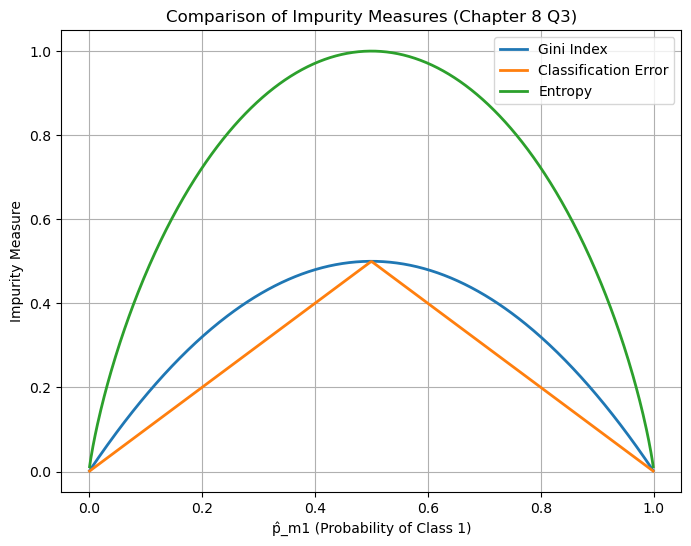

All three impurity measures reach their minimum at p = 0 or p = 1, and maximum near p = 0.5.


In [3]:
p = np.linspace(0.001, 0.999, 500)
gini = 2 * p * (1 - p)
class_error = 1 - np.maximum(p, 1 - p)
entropy = -(p*np.log2(p) + (1-p)*np.log2(1-p))

plt.figure(figsize=(8,6))
plt.plot(p, gini, label='Gini Index', lw=2)
plt.plot(p, class_error, label='Classification Error', lw=2)
plt.plot(p, entropy, label='Entropy', lw=2)
plt.xlabel('p̂_m1 (Probability of Class 1)')
plt.ylabel('Impurity Measure')
plt.title('Comparison of Impurity Measures (Chapter 8 Q3)')
plt.legend()
plt.grid(True)
plt.show()

print('All three impurity measures reach their minimum at p = 0 or p = 1, and maximum near p = 0.5.')

### Discussion

All three impurity measures are **0** when the node is pure $hat{p}_{m1} = 0$ or $1$, and reach their **maximum** when the classes are evenly mixed $hat{p}_{m1} = 0.5$.

- The **classification error** curve is flat at the top and less sensitive to small probability changes.  
- The **Gini index** and **entropy** change smoothly and provide stronger gradients for splitting.  
- Both Gini and entropy are therefore preferred for decision tree learning because they **encourage purer splits**.

Thus, impurity measures capture how mixed a node is, and minimizing them helps decision trees create **more homogeneous child nodes**.
